In [ ]:
from sklearn.model_selection import GridSearchCV

def grid_search_classifiers(classifiers, param_grids, X_train, y_train):
    best_params = {}
    for name, clf in classifiers.items():
        grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_params[name] = grid_search.best_params_
    return best_params

# Define the parameter grids for each classifier
param_grids = {
    'logistic regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'sigmoid']
    },
    'Random Forest': {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

# Find the best parameters for each classifier
best_params = grid_search_classifiers(classifiers, param_grids, X_train, y_train)

# Update classifiers with the best parameters
for name, clf in classifiers.items():
    clf.set_params(**best_params[name])

# Evaluate classifiers with the new parameters
classifier_results = evaluate_classifiers(classifiers, X_train, X_test, y_train, y_test)

for name, accuracy in classifier_results.items():
    print(f"{name}: {accuracy:.2f}")


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Define classifiers
classifiers = {
    'logistic regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

# Define parameter grids for grid search
param_grids = {
    'logistic regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]  # Inverse of regularization strength
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],  # Regularization parameter
        'gamma': ['scale', 'auto', 0.1, 1, 10, 100],  # Kernel coefficient
        'kernel': ['linear', 'rbf', 'sigmoid']  # Kernel type
    },
    'Random Forest': {
        'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
        'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to use
        'weights': ['uniform', 'distance'],  # Weight function used in prediction
        'metric': ['euclidean', 'manhattan']  # Distance metric for tree
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
        'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
    },
    'Gradient Boosting': {
        'n_estimators': [10, 50, 100, 200],  # Number of boosting stages to perform
        'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Learning rate
        'max_depth': [3, 5, 8, 10],  # Maximum depth of the individual regression estimators
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
       
        'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
    },
    'XGBoost': {
        'n_estimators': [10, 50, 100, 200],  # Number of boosting rounds
        'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Boosting learning rate
        'max_depth': [3, 5, 8, 10],  # Maximum tree depth
        'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight needed in a child
        'gamma': [0, 0.1, 0.2, 0.3],  # Minimum loss reduction required to make a further partition
        'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
        'colsample_bytree': [0.8, 0.9, 1.0]  # Subsample ratio of columns when constructing each tree
    },
    'LightGBM': {
        'n_estimators': [10, 50, 100, 200],  # Number of boosting rounds
        'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Boosting learning rate
        'max_depth': [3, 5, 8, 10],  # Maximum tree depth
        'num_leaves': [31, 50, 70, 100],  # Maximum tree leaves for base learners
        'min_child_samples': [5, 10, 20, 30],  # Minimum number of data needed in a leaf
        'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
        'colsample_bytree': [0.8, 0.9, 1.0]  # Subsample ratio of columns when constructing each tree
    },
    'CatBoost': {
        'n_estimators': [10, 50, 100, 200],  # Number of boosting rounds
        'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Boosting learning rate
        'depth': [3, 5, 8, 10],  # Maximum tree depth
        'l2_leaf_reg': [1, 3, 5, 7, 9],  # Coefficient at the L2 regularization term
        'bagging_temperature': [0, 0.5, 1, 1.5],  # Controls the intensity of Bayesian bagging
        'border_count': [32, 64, 128, 254]  # Number of splits for numerical features
    }
}


XGBoostError: 
XGBoost Library (xgboost.dll) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['[WinError 193] %1 is not a valid Win32 application']


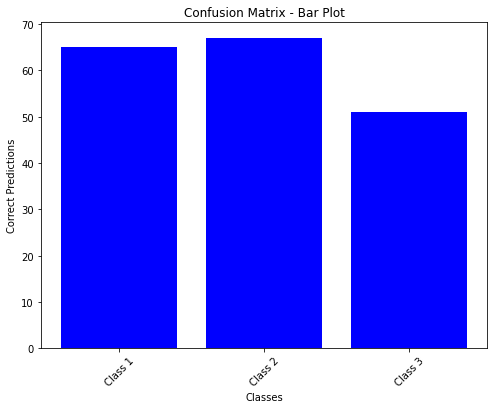

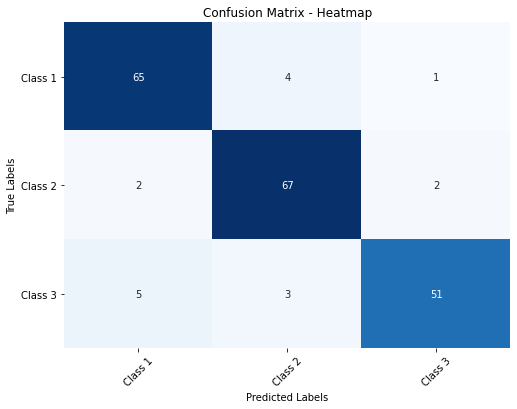

In [4]:
# Create a dummy dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=3, n_redundant=10, n_classes=3, random_state=42)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a bar plot for the confusion matrix
plt.figure(figsize=(8, 6))
plt.bar(np.arange(cm.shape[0]), cm.diagonal(), color='blue')
plt.xticks(np.arange(cm.shape[0]), labels=['Class 1', 'Class 2', 'Class 3'], rotation=45)
plt.xlabel('Classes')
plt.ylabel('Correct Predictions')
plt.title('Confusion Matrix - Bar Plot')
plt.show()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xticks(np.arange(cm.shape[0]) + 0.5, labels=['Class 1', 'Class 2', 'Class 3'], rotation=45)
plt.yticks(np.arange(cm.shape[0]) + 0.5, labels=['Class 1', 'Class 2', 'Class 3'], rotation=0)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Heatmap')
plt.show()


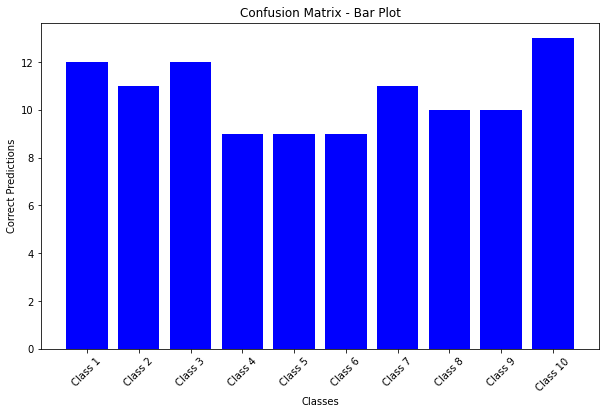

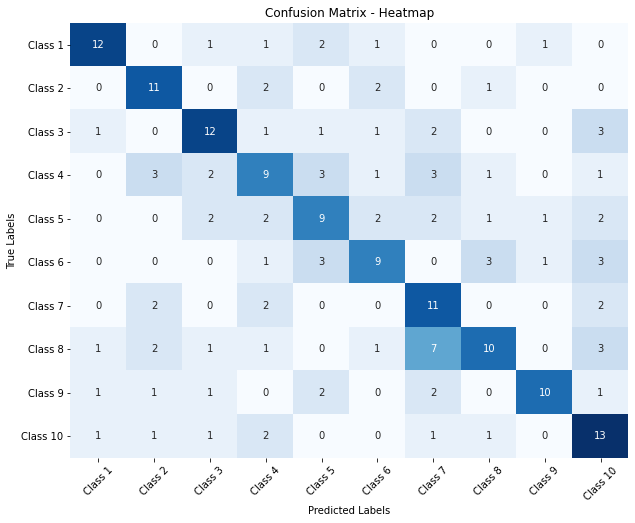

In [5]:
# Create a dummy dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, n_classes=10, random_state=42)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a bar plot for the confusion matrix
plt.figure(figsize=(10, 6))
plt.bar(np.arange(cm.shape[0]), cm.diagonal(), color='blue')
plt.xticks(np.arange(cm.shape[0]), labels=[f'Class {i+1}' for i in range(10)], rotation=45)
plt.xlabel('Classes')
plt.ylabel('Correct Predictions')
plt.title('Confusion Matrix - Bar Plot')
plt.show()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xticks(np.arange(cm.shape[0]) + 0.5, labels=[f'Class {i+1}' for i in range(10)], rotation=45)
plt.yticks(np.arange(cm.shape[0]) + 0.5, labels=[f'Class {i+1}' for i in range(10)], rotation=0)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Heatmap')
plt.show()


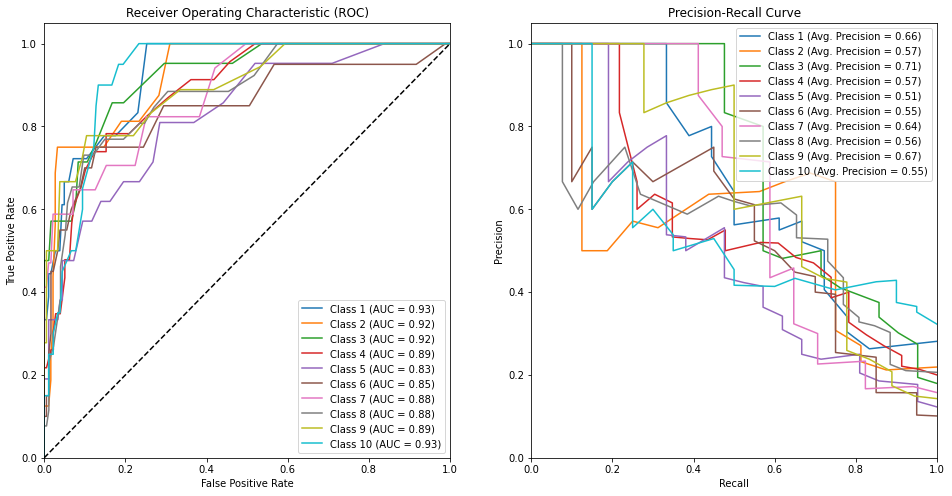

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# One-hot encode the true labels
y_test_one_hot = np.eye(10)[y_test]

# Calculate class probabilities for each sample
y_probs = clf.predict_proba(X_test)

# Initialize a figure to plot the ROC and precision-recall curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Loop over each class and calculate the ROC curve, AUC, and precision-recall curve
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    ax1.plot(fpr, tpr, label=f'Class {i + 1} (AUC = {roc_auc:.2f})')

    precision, recall, _ = precision_recall_curve(y_test_one_hot[:, i], y_probs[:, i])
    avg_precision = average_precision_score(y_test_one_hot[:, i], y_probs[:, i])
    ax2.plot(recall, precision, label=f'Class {i + 1} (Avg. Precision = {avg_precision:.2f})')

# Configure the ROC curve plot
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC)')
ax1.legend(loc="lower right")

# Configure the precision-recall curve plot
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="upper right")

plt.show()
